# Yeast

Link: https://archive.ics.uci.edu/dataset/110/yeast 

Is normally a multicalss dataset, but can be used to test different imbalanced ratios
in SMOTified-GAN CYT vs. ME2

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
import json
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [3]:
info_path = "../data/info/yeast.json"
data_path = "../data/raw/yeast/yeast.data"

with open(info_path, "r") as f:
    info = json.load(f)

# load relevatn information from info json
majority_class = info["majority_class"]
minority_class = info["minority_class"]
target = info["target_col"]
column_names = info["column_names"]
header = info["header"]

df = pd.read_csv(data_path, delim_whitespace=True, header=header)

# add column names
df.columns = column_names 

# remove unrelevant column
df.drop(columns=["Sequence.Name"], inplace=True)

# filter for minortiy and majoirty class 
df = df[(df[target] == majority_class) | (df[target] == minority_class)]

df_src = df.copy()

# create train and test splits
X = df.iloc[:, :-1]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# combine X and y for train and test
X_train[target] = y_train
X_test[target] = y_test

# create different splite of training data
train_min = X_train[X_train[target] == minority_class]
train_maj_sampled = X_train[X_train[target] == majority_class].sample(n=train_min.shape[0], random_state=42)
train_balanced = pd.concat([train_min, train_maj_sampled])
# shuffle train_balanced 
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

/var/folders/gv/d21k9b7d7v9d382g4l3v4rqm0000gn/T/ipykernel_43422/1806580928.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_path, delim_whitespace=True, header=header)


In [8]:
X_train[target].value_counts()

localization.site
CYT    370
ME2     41
Name: count, dtype: int64

In [9]:
num_min = 41
num_maj = 370
print("to generate:", num_maj - num_min)

to generate: 329


In [55]:
df_src

,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization.site
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT
12,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,CYT
15,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,CYT
16,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,CYT
...,...,...,...,...,...,...,...,...,...
1477,0.38,0.32,0.64,0.41,0.5,0.0,0.44,0.11,CYT
1478,0.38,0.40,0.66,0.35,0.5,0.0,0.43,0.11,CYT
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2


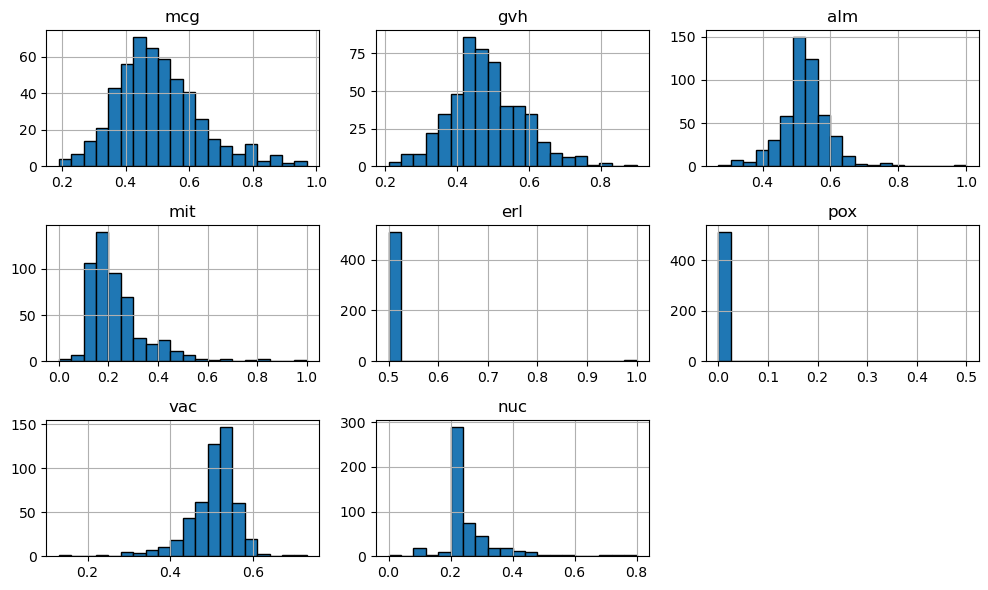

In [60]:
df.iloc[:, :-1].hist(bins=20, figsize=(10,6), edgecolor='black')
plt.tight_layout()
plt.show()

Inspect distribution of "erl", "pox" in more detail, dose maybe classify as long tail distribution